## Import Libraries & Load Dataset

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

## UBER Dataset

In [2]:
data = pd.read_csv("UBER.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [3]:
data["Date"] = pd.to_datetime(data["Date"])
data = data[["Date","Close"]]
data.head()

,Date,Close
0,2019-05-10,41.570000
1,2019-05-13,37.099998
2,2019-05-14,39.959999
3,2019-05-15,41.290001
4,2019-05-16,43.000000


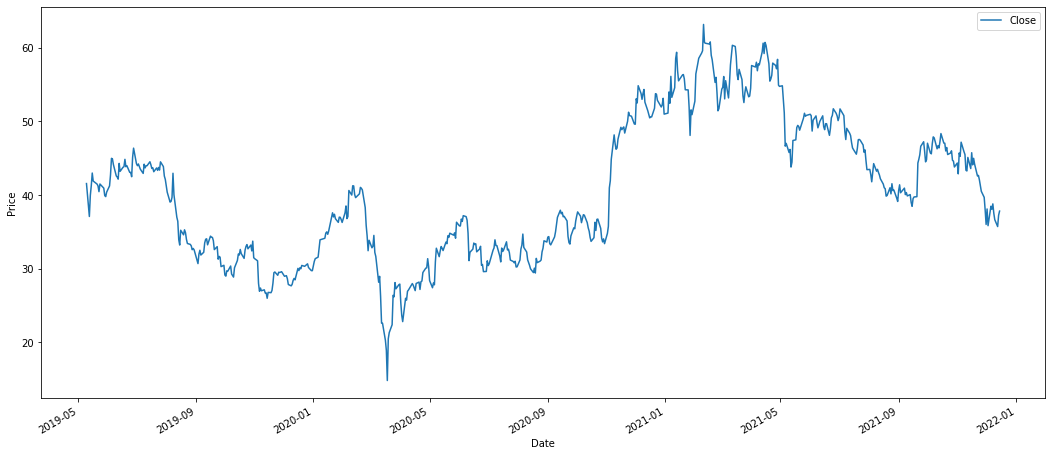

In [4]:
data.set_index("Date").plot(figsize=(18,8),xlabel="Date",ylabel="Price")

In [5]:
data.rename(columns={"Date":"ds","Close":"y"},inplace=True)

# Model 
## fbprophet

In [7]:
prophet = Prophet()
prophet.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = prophet.make_future_dataframe(periods=180)
forecast = prophet.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
832,2022-06-09,35.941158,31.290889,43.919886,31.205816,40.985223,1.495941,1.495941,1.495941,0.598736,0.598736,0.598736,0.897206,0.897206,0.897206,0.0,0.0,0.0,37.437099
833,2022-06-10,35.902448,31.669447,43.849048,31.122430,41.004894,1.545084,1.545084,1.545084,0.708703,0.708703,0.708703,0.836381,0.836381,0.836381,0.0,0.0,0.0,37.447533
834,2022-06-11,35.863739,28.776122,41.720436,31.061448,41.023119,-0.764582,-0.764582,-0.764582,-1.529359,-1.529359,-1.529359,0.764777,0.764777,0.764777,0.0,0.0,0.0,35.099156
835,2022-06-12,35.825029,28.896889,41.721166,31.000717,41.038044,-0.844562,-0.844562,-0.844562,-1.529359,-1.529359,-1.529359,0.684798,0.684798,0.684798,0.0,0.0,0.0,34.980467
836,2022-06-13,35.786319,30.591270,43.378379,30.904376,41.048508,1.088251,1.088251,1.088251,0.489366,0.489366,0.489366,0.598885,0.598885,0.598885,0.0,0.0,0.0,36.874570


Text(0.5, 1.0, 'UBER price stock forecasting')

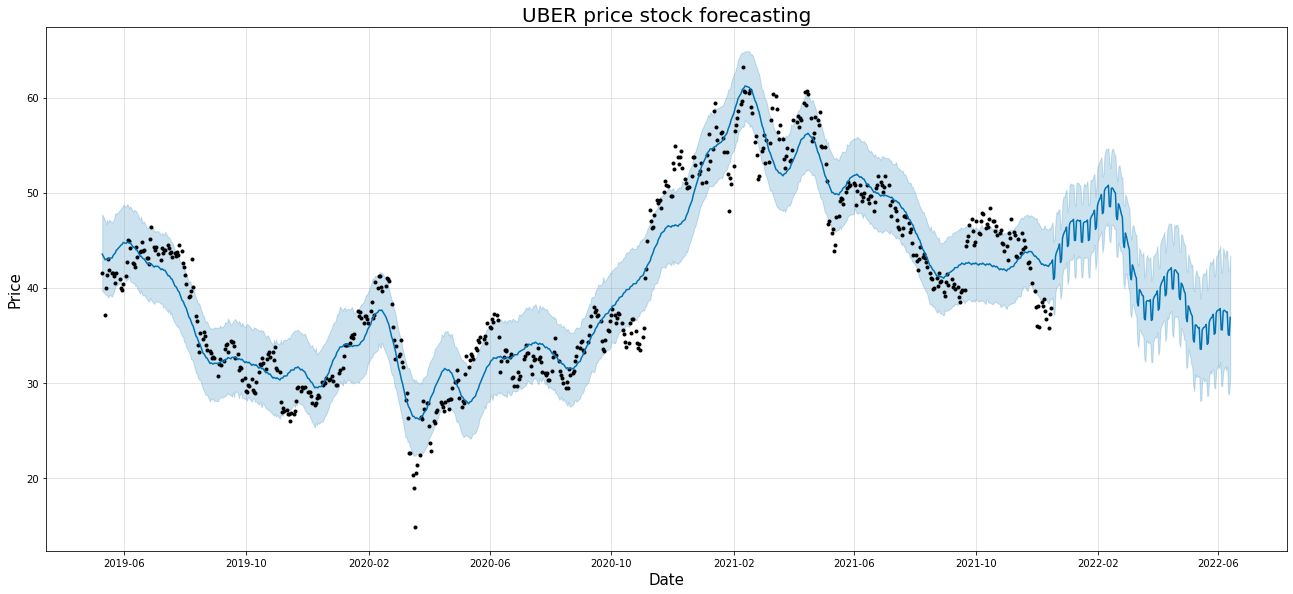

In [9]:
prophet.plot(forecast,figsize=(18,8))
plt.xlabel("Date",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("UBER price stock forecasting",fontsize=20)

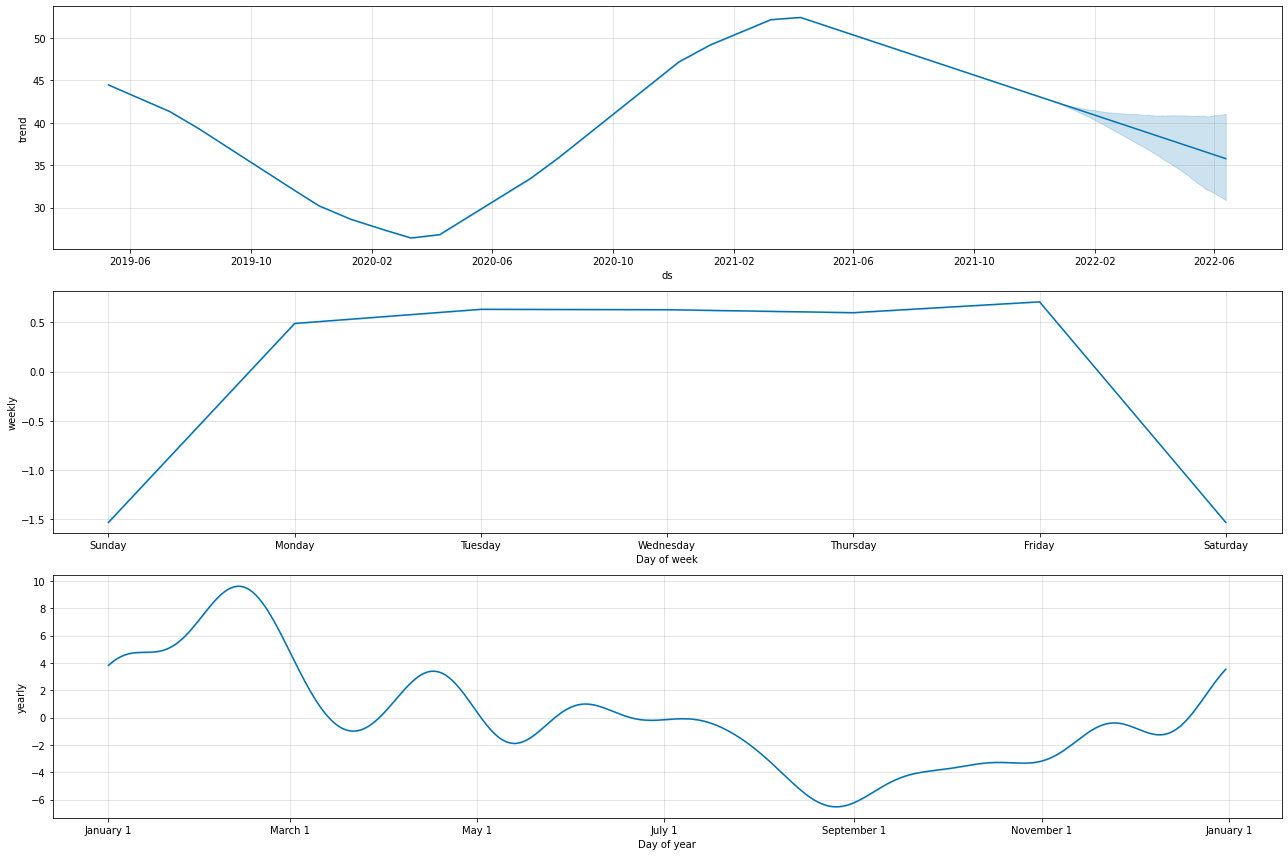

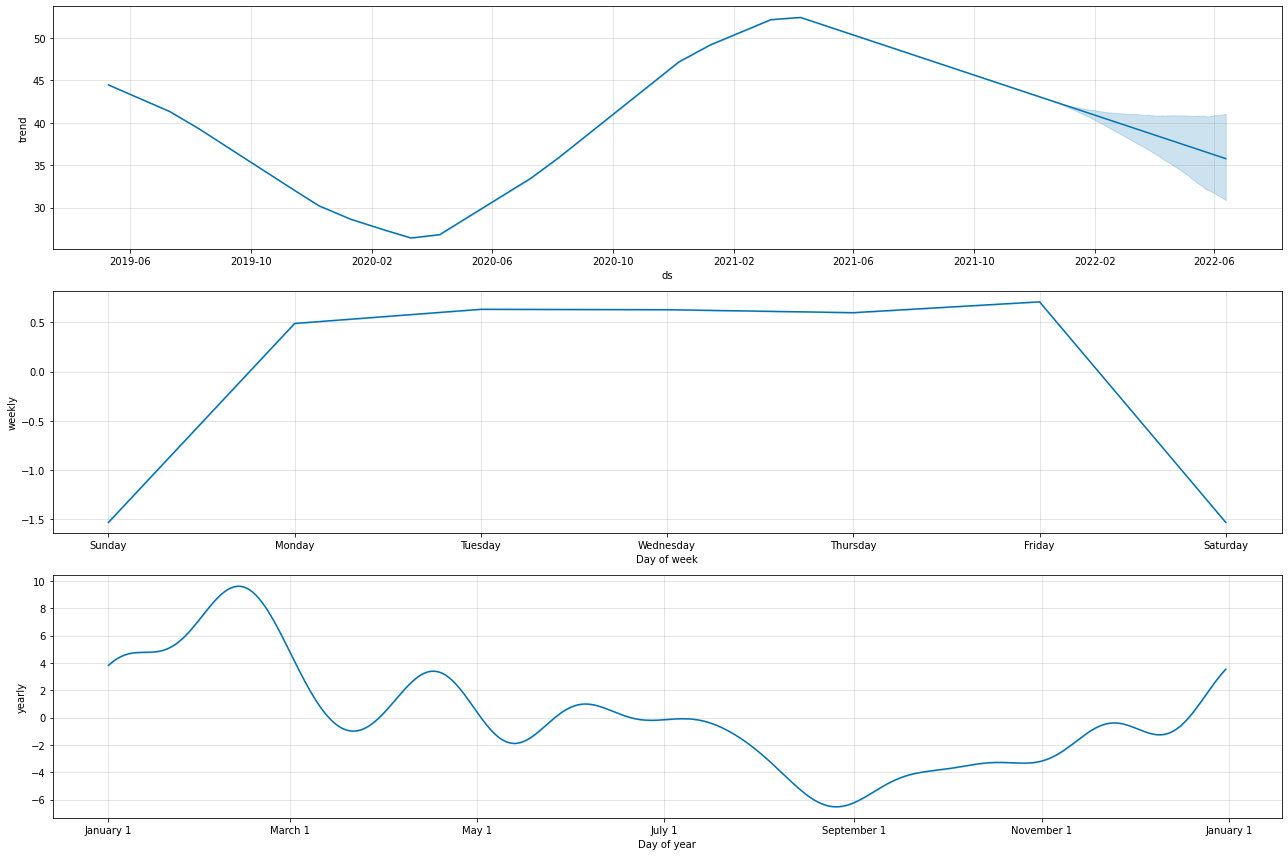

In [10]:
prophet.plot_components(forecast,figsize=(18,12))